In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction Variable

In [1]:
a = 5

In [ ]:
b = 6

In [ ]:
print (a+b)

11


In [ ]:
c = "String is Now"

In [ ]:
print (c)

String is Now


Introduction to Loping

In [ ]:
print (a+0)
print (a+1)
print (a+2)

5
6
7


In [ ]:
for i in range (5):
  print (a+i)

5
6
7
8
9


# Read Data and Clean Data

In [ ]:
#how to read data in google sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1mSslatBwaydYUdZYdJSHkZA-wisvV1ViXhpQkGBgH6o/edit#gid=1903509374"
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1mSslatBwaydYUdZYdJSHkZA-wisvV1ViXhpQkGBgH6o/export?format=csv&gid=1903509374


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [ ]:
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [ ]:
#change type date to timestamps
df_cleaned = df.copy()

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Revenue'] = df_cleaned['Unit price'] * df_cleaned['Quantity']

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB
None


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
#check typo
df_cleaned['City'].value_counts()
df_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [ ]:
for col_name in ['Payment', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line']:
  print(df_cleaned[col_name].value_counts(), '\n') 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [ ]:
#replace data(how to replace pandas(list and dictionary phyton))
dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'}
df_replace = df_cleaned.replace(dict_typo)
df_replace.head()
      

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
df_replace['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
df_replace['Invoice ID'].duplicated().sum()

0

#EDA

##daily trend overall

In [ ]:
agg_daily = df_replace.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()
agg_daily.head()

<ipython-input-30-b973eeb24319>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_replace.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55


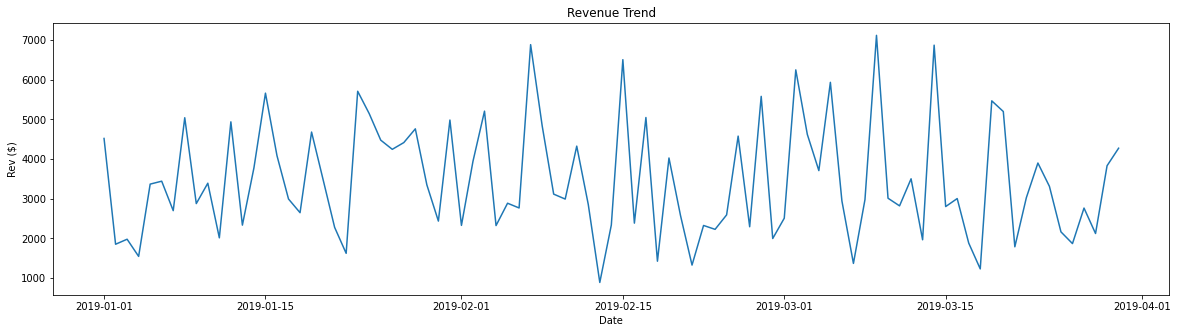

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)

plt.plot('Date', 'Revenue', data=agg_daily)
plt.title('Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Rev ($)')
plt.show()

In [ ]:
agg_payment = df_replace.groupby('Payment', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' : 'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


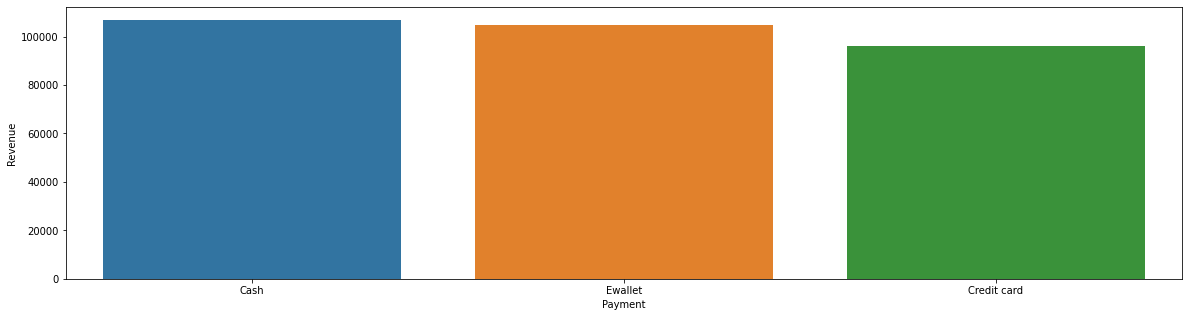

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot('Payment', 'Revenue', data = agg_payment.sort_values('Revenue', ascending=False))